In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

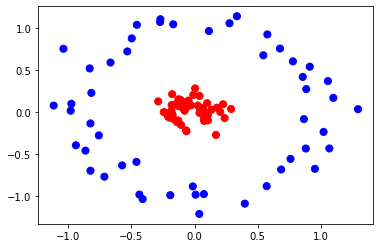

In [2]:
from sklearn.datasets import make_circles
X,y = make_circles(100, factor = .1, noise = .1)

plt.scatter(X[:,0],X[:,1], c = y, s = 50, cmap = 'bwr')

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)


In [4]:
classifier = SVC(kernel = 'linear')
classifier.fit(X_train,y_train.ravel())

SVC(kernel='linear')

In [5]:
y_pred = classifier.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.4

In [7]:
zero_one_colourmap = ListedColormap(('blue','red'))
def plot_decision_boundary(X,y,clf):
    X_set,y_set = X,y
    X1,X2 = np.meshgrid(
        np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max() + 1,step = 0.01),
        np.arange(start = X_set[:,1].min()-1,stop = X_set[:,1].max() + 1,step = 0.01)
    )
    plt.contour(X1,X2,clf.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = zero_one_colourmap)
    plt.xlim(X1.min(),X1.max())
    plt.ylim(X2.min(),X2.max())
    
    for i,j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set==j,0], X_set[y_set == j,1], c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

<ipython-input-7-eb95e68e6521>:8: UserWarning: No contour levels were found within the data range.
  plt.contour(X1,X2,clf.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = zero_one_colourmap)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


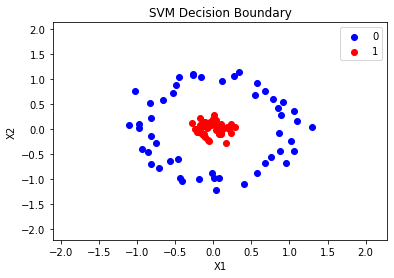

In [8]:
plot_decision_boundary(X,y,classifier)

In [9]:
def plot_3d_plot(X,y):
    r = np.exp(-(X**2).sum(1))
    ax = plt.subplot(projection = '3d')
    ax.scatter3D(X[:,0],X[:,1],r,c = y, s = 100, cmap = 'bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3DSubplot:xlabel='X1', ylabel='X2'>

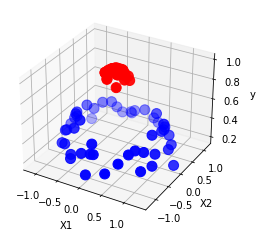

In [10]:
plot_3d_plot(X,y)

In [11]:
rbf_classifier = SVC(kernel = 'rbf')
rbf_classifier.fit(X_train,y_train)
y_pred = rbf_classifier.predict(X_test)

In [12]:
accuracy_score(y_test,y_pred)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


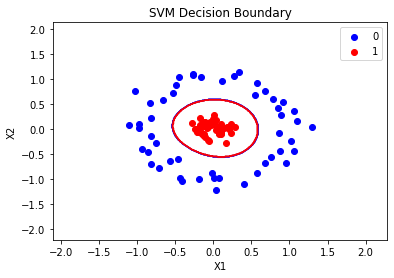

In [13]:
plot_decision_boundary(X,y,rbf_classifier)

In [14]:
z = lambda x,y: (-rbf_classifier.intercept_[0]-rbf_classifier.coef_[0][0]*x-rbf_classifier.coef_[0][1]*y) / rbf_classifier.coef_[0][2]

In [15]:
import plotly.express as px
import plotly.express as px
fig = px.scatter_3d(x = X[:,0],y=X[:,1],z= y[:],color = y)
fig.show()